In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Inventory dataset
inventory_df = pd.read_excel("Inventory Dataset.xlsx")

# Load the New Inventory dataset
new_inventory_df = pd.read_excel("New Inventory.xlsx")


In [12]:
print(inventory_df)

     Item Number       Date  Inventory
0    064-01-1347 2023-06-17       3561
1    064-01-1361 2023-06-17       4035
2    064-01-1375 2023-06-17       2684
3    064-01-1385 2023-06-17       5136
4    064-01-1399 2023-06-17       6399
..           ...        ...        ...
351  064-18-9909 2023-06-17         12
352  064-18-9962 2023-06-17         19
353  064-18-0790 2023-06-17          5
354  064-18-3316 2023-06-17       7354
355  064-18-9667 2023-06-17       7029

[356 rows x 3 columns]


In [13]:
print(new_inventory_df)

      Item Number Inventory Receive  Total Item Qty
0     064-13-0002        2023-07-07             700
1     064-13-0338        2023-07-07            1700
2     064-13-0340        2023-07-07            1000
3     064-13-0353        2023-07-07            1900
4     064-13-0416        2023-07-07            1000
...           ...               ...             ...
1034  064-09-3787        2023-07-07            2088
1035  064-09-5287        2023-07-07            1388
1036  064-09-7924        2023-07-07            1632
1037  064-09-9076        2023-07-07            1708
1038  064-09-9115        2023-07-07            1920

[1039 rows x 3 columns]


In [18]:
# Converting 'Date' and 'Inventory Receive date' columns to datetime format
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])
new_inventory_df['Inventory Receive'] = pd.to_datetime(new_inventory_df['Inventory Receive'])
print(inventory_df['Date'])

0     2023-06-17
1     2023-06-17
2     2023-06-17
3     2023-06-17
4     2023-06-17
         ...    
351   2023-06-17
352   2023-06-17
353   2023-06-17
354   2023-06-17
355   2023-06-17
Name: Date, Length: 356, dtype: datetime64[ns]


In [16]:
print(inventory_df)

     Item Number       Date  Inventory
0    064-01-1347 2023-06-17       3561
1    064-01-1361 2023-06-17       4035
2    064-01-1375 2023-06-17       2684
3    064-01-1385 2023-06-17       5136
4    064-01-1399 2023-06-17       6399
..           ...        ...        ...
351  064-18-9909 2023-06-17         12
352  064-18-9962 2023-06-17         19
353  064-18-0790 2023-06-17          5
354  064-18-3316 2023-06-17       7354
355  064-18-9667 2023-06-17       7029

[356 rows x 3 columns]


In [19]:
# Merging the two datasets on 'Item Number' and 'Date'
merged_df = pd.merge(inventory_df, new_inventory_df, how='outer', left_on='Item Number', right_on='Item Number')
print(merged_df)

      Item Number       Date  Inventory Inventory Receive  Total Item Qty
0     064-01-1347 2023-06-17     3561.0        2023-07-10          2000.0
1     064-01-1347 2023-06-17     3561.0        2023-07-07          1000.0
2     064-01-1347 2023-06-17     3561.0        2023-07-09          3568.0
3     064-01-1347 2023-06-17     3561.0        2023-08-04          1800.0
4     064-01-1361 2023-06-17     4035.0        2023-07-10          2000.0
...           ...        ...        ...               ...             ...
1224  064-18-4752        NaT        NaN        2023-11-26         12424.0
1225  064-18-3496        NaT        NaN        2023-08-16         20812.0
1226  064-18-3496        NaT        NaN        2023-09-15          9940.0
1227  064-18-4295        NaT        NaN        2023-08-16         14820.0
1228  064-18-4295        NaT        NaN        2023-09-15          5148.0

[1229 rows x 5 columns]


In [20]:
# Filling missing values in the 'Inventory' column with 0
merged_df['Inventory'].fillna(0, inplace=True)

print(merged_df)

      Item Number       Date  Inventory Inventory Receive  Total Item Qty
0     064-01-1347 2023-06-17     3561.0        2023-07-10          2000.0
1     064-01-1347 2023-06-17     3561.0        2023-07-07          1000.0
2     064-01-1347 2023-06-17     3561.0        2023-07-09          3568.0
3     064-01-1347 2023-06-17     3561.0        2023-08-04          1800.0
4     064-01-1361 2023-06-17     4035.0        2023-07-10          2000.0
...           ...        ...        ...               ...             ...
1224  064-18-4752        NaT        0.0        2023-11-26         12424.0
1225  064-18-3496        NaT        0.0        2023-08-16         20812.0
1226  064-18-3496        NaT        0.0        2023-09-15          9940.0
1227  064-18-4295        NaT        0.0        2023-08-16         14820.0
1228  064-18-4295        NaT        0.0        2023-09-15          5148.0

[1229 rows x 5 columns]


In [21]:
# Creating a pivot table to reshape the data for the desired format
pivot_table = merged_df.pivot_table(index='Item Number', columns='Date', values='Inventory', aggfunc='sum', fill_value=0)
print(pivot_table)

Date         2023-06-17
Item Number            
064-01-0006          10
064-01-1346       14770
064-01-1347       14244
064-01-1348       12112
064-01-1349        8144
...                 ...
064-18-9878           2
064-18-9884       12419
064-18-9909          12
064-18-9938       19152
064-18-9962          19

[356 rows x 1 columns]


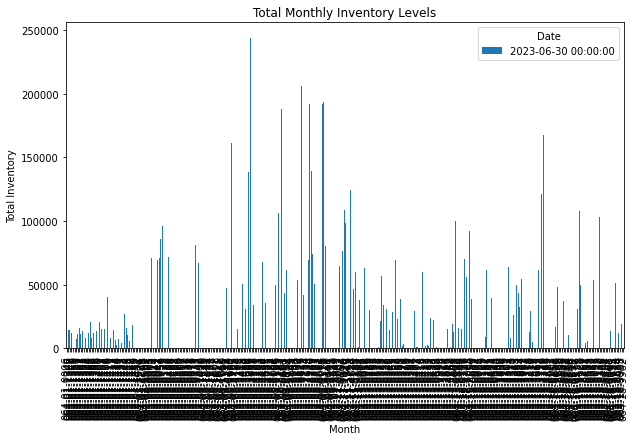

In [22]:
monthly_totals = pivot_table.resample('M', axis=1).sum()
monthly_totals.plot(kind='bar', figsize=(10, 6))
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.show()